# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ghanzi
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | zeya
Processing Record 7 of Set 1 | vadso
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | happy valley-goose bay
Processing Record 10 of Set 1 | ixtapa
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | port saint john's
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | nabire
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1

Processing Record 39 of Set 4 | quellon
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | college
Processing Record 42 of Set 4 | kapuskasing
Processing Record 43 of Set 4 | semnan
Processing Record 44 of Set 4 | aksu
Processing Record 45 of Set 4 | selfoss
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | santiago de veraguas
Processing Record 48 of Set 4 | shasta lake
Processing Record 49 of Set 4 | brisas de zicatela
Processing Record 0 of Set 5 | petropavlovka
Processing Record 1 of Set 5 | vernon
Processing Record 2 of Set 5 | medina sidonia
Processing Record 3 of Set 5 | kadugli
Processing Record 4 of Set 5 | roxas
Processing Record 5 of Set 5 | najran
Processing Record 6 of Set 5 | motueka
Processing Record 7 of Set 5 | ulysses
Processing Record 8 of Set 5 | fada
Processing Record 9 of Set 5 | berdigestyakh
Processing Record 10 of Set 5 | severnoye
Processing Record 11 of Set 5 | ketchikan
Processing Record 12 of Set 5 | kastsyuko

Processing Record 29 of Set 8 | salinopolis
Processing Record 30 of Set 8 | boda
Processing Record 31 of Set 8 | sitka
Processing Record 32 of Set 8 | piton saint-leu
Processing Record 33 of Set 8 | at taj
Processing Record 34 of Set 8 | novodvinsk
Processing Record 35 of Set 8 | sen monorom
Processing Record 36 of Set 8 | los frentones
Processing Record 37 of Set 8 | pimenta bueno
Processing Record 38 of Set 8 | pemba
Processing Record 39 of Set 8 | minot air force base
Processing Record 40 of Set 8 | mangalia
Processing Record 41 of Set 8 | eduardo castex
Processing Record 42 of Set 8 | el trebol
Processing Record 43 of Set 8 | lazaro cardenas
Processing Record 44 of Set 8 | mandimba
City not found. Skipping...
Processing Record 45 of Set 8 | novyy urengoy
Processing Record 46 of Set 8 | muzayri'
City not found. Skipping...
Processing Record 47 of Set 8 | weihai
Processing Record 48 of Set 8 | vilassar de mar
Processing Record 49 of Set 8 | zhongshu
Processing Record 0 of Set 9 | kat

Processing Record 23 of Set 12 | horezu
Processing Record 24 of Set 12 | akrehamn
Processing Record 25 of Set 12 | nova vicosa
Processing Record 26 of Set 12 | nogliki
Processing Record 27 of Set 12 | lagoa
Processing Record 28 of Set 12 | morondava
Processing Record 29 of Set 12 | janakpur
Processing Record 30 of Set 12 | nha trang
Processing Record 31 of Set 12 | obihiro
Processing Record 32 of Set 12 | harstad
Processing Record 33 of Set 12 | hafnarfjordur
Processing Record 34 of Set 12 | ouargaye
Processing Record 35 of Set 12 | saint-philippe
Processing Record 36 of Set 12 | cunit
Processing Record 37 of Set 12 | zaozersk
Processing Record 38 of Set 12 | kharp
Processing Record 39 of Set 12 | 'ajab shir
City not found. Skipping...
Processing Record 40 of Set 12 | greymouth
Processing Record 41 of Set 12 | louiseville
Processing Record 42 of Set 12 | novosokol'niki
Processing Record 43 of Set 12 | jinghong
Processing Record 44 of Set 12 | turtas
Processing Record 45 of Set 12 | yag

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ghanzi,-21.5667,21.7833,27.06,15,1,4.32,BW,1697218454
1,kailua-kona,19.6406,-155.9956,26.39,78,40,2.06,US,1697218454
2,atafu village,-8.5421,-172.5159,28.57,76,89,10.09,TK,1697218454
3,grytviken,-54.2811,-36.5092,0.21,92,70,6.45,GS,1697218454
4,namibe,-15.1961,12.1522,19.17,78,18,2.29,AO,1697218455


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ghanzi,-21.5667,21.7833,27.06,15,1,4.32,BW,1697218454
1,kailua-kona,19.6406,-155.9956,26.39,78,40,2.06,US,1697218454
2,atafu village,-8.5421,-172.5159,28.57,76,89,10.09,TK,1697218454
3,grytviken,-54.2811,-36.5092,0.21,92,70,6.45,GS,1697218454
4,namibe,-15.1961,12.1522,19.17,78,18,2.29,AO,1697218455


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

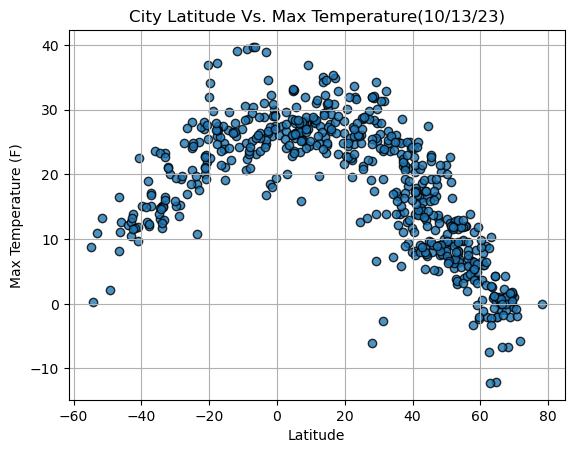

In [15]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, linewidth=1, marker="o",
           alpha=0.8, label="Cities", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

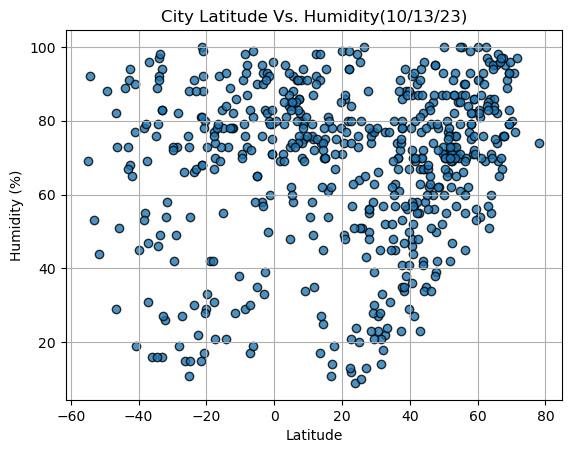

In [16]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, linewidth=1, marker="o",
           alpha=0.8, label="Cities", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

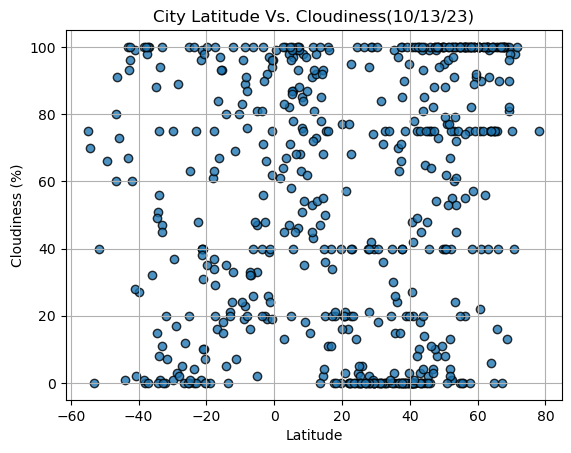

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, linewidth=1, marker="o",
           alpha=0.8, label="Cities", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

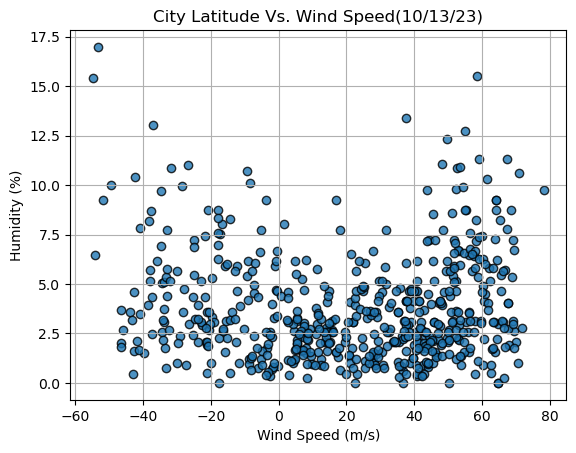

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, linewidth=1, marker="o",
           alpha=0.8, label="Cities", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Wind Speed (m/s)")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_reg(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kailua-kona,19.6406,-155.9956,26.39,78,40,2.06,US,1697218454
5,zeya,53.7500,127.2667,6.94,57,45,0.91,RU,1697218455
6,vadso,70.0744,29.7487,1.09,80,75,2.06,NO,1697218455
8,happy valley-goose bay,53.3168,-60.3315,8.17,93,100,6.69,CA,1697218455
9,ixtapa,20.7000,-105.2000,30.13,74,20,1.34,MX,1697218455


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ghanzi,-21.5667,21.7833,27.06,15,1,4.32,BW,1697218454
2,atafu village,-8.5421,-172.5159,28.57,76,89,10.09,TK,1697218454
3,grytviken,-54.2811,-36.5092,0.21,92,70,6.45,GS,1697218454
4,namibe,-15.1961,12.1522,19.17,78,18,2.29,AO,1697218455
7,adamstown,-25.0660,-130.1015,20.73,73,100,5.46,PN,1697218455


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8496926486345046


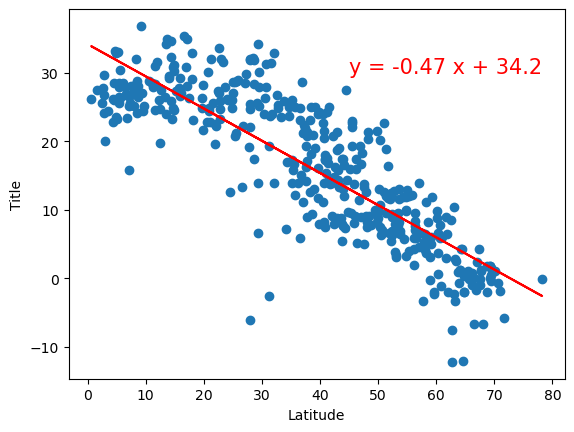

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_reg(x_values,y_values, 'Max Temp', (45,30))

The r-squared is: 0.7527533518768214


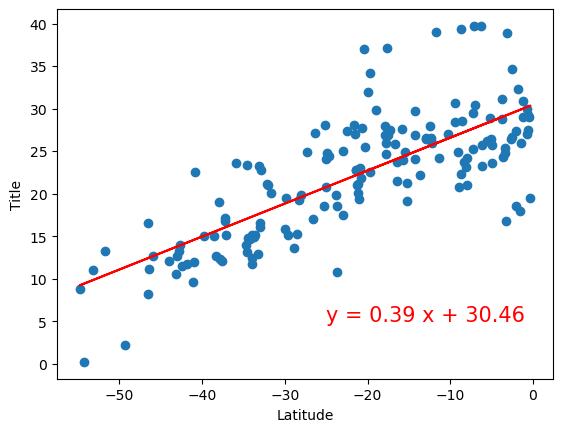

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_reg(x_values,y_values, 'Max Temp', (-25,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14554686264969866


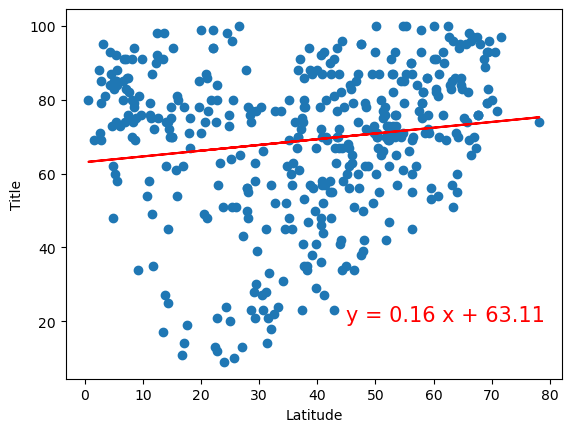

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_reg(x_values,y_values, 'Humidity', (45,20))

The r-squared is: 0.11114071762284328


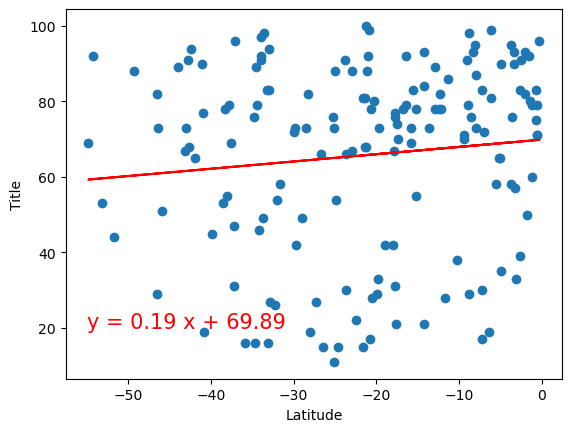

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_reg(x_values,y_values, 'Humidity', (-55,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.17272238400823997


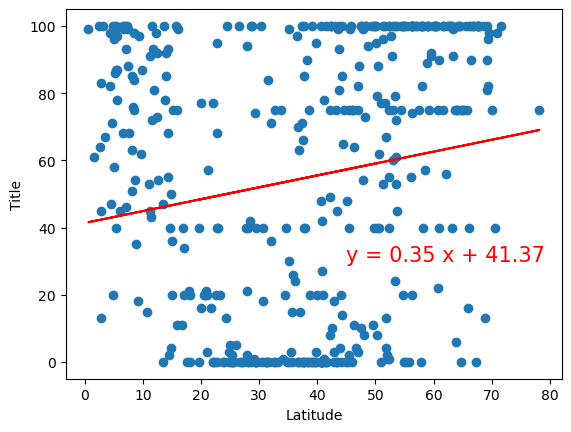

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_reg(x_values,y_values, 'Cloudiness', (45,30))

The r-squared is: 0.029001861327218253


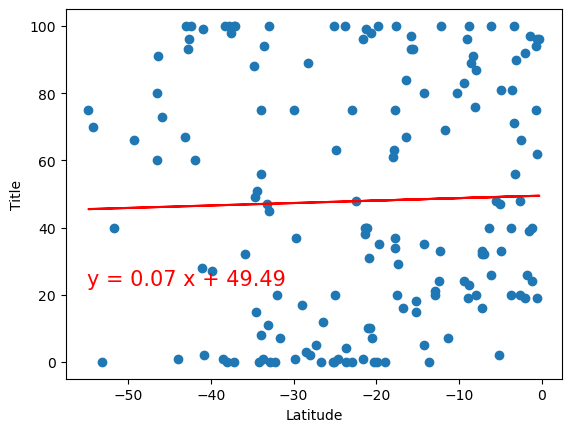

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_reg(x_values,y_values, 'Cloudiness', (-55,23))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.3036699229626331


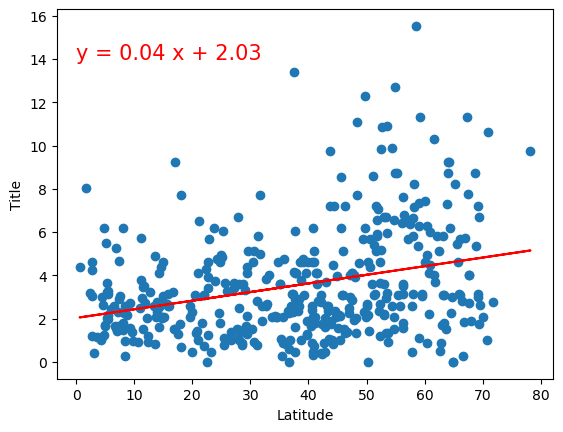

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_reg(x_values,y_values, 'Wind Speed', (0,14))

The r-squared is: -0.291228014967239


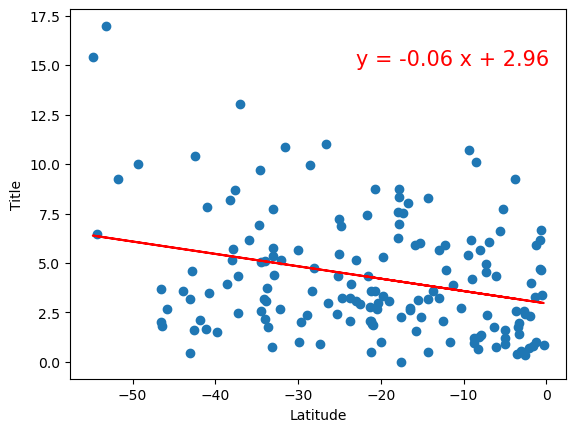

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_reg(x_values,y_values, 'Wind Speed', (-23,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE